<a href="https://colab.research.google.com/github/souvik25162/Machine-Learning/blob/master/Copy_of_Untitled1_loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from google.colab import files
uploaded=files.upload()
df=pd.read_csv('train loan.csv')
df.head(7)

Saving train loan.csv to train loan.csv


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [0]:
df.shape

(614, 13)

In [0]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [0]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

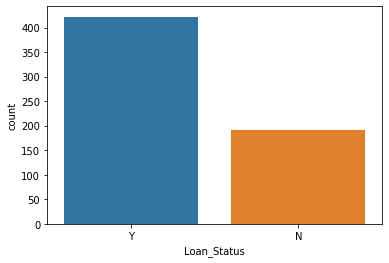

In [0]:
sns.countplot(df['Loan_Status'],label='count')

In [0]:
df.dtypes


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [0]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder_Y= LabelEncoder()
for column in df.columns:
  if df[column].dtype == np.number:
    continue
  else:
    df[column]=LabelEncoder().fit_transform(df[column])  

In [0]:
df=df.dropna(axis=0)

In [0]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,0,247,1508.0,128.0,360.0,1.0,0,0
2,1,1,1,0,0,1,112,0.0,66.0,360.0,1.0,2,1
3,2,1,1,0,1,0,74,2358.0,120.0,360.0,1.0,2,1
4,3,1,0,0,0,0,305,0.0,141.0,360.0,1.0,2,1
5,4,1,1,2,0,1,281,4196.0,267.0,360.0,1.0,2,1


In [0]:
df.iloc[:,1:13].corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.349424,0.217510,0.059245,-0.002761,0.048612,0.156171,0.098975,-0.088704,0.022447,-0.000204,0.064504
Married,0.349424,1.000000,0.386367,0.001652,0.015674,-0.002061,0.102950,0.183442,-0.107504,0.029095,0.038653,0.112321
Dependents,0.217510,0.386367,1.000000,0.028608,0.045754,0.153037,-0.000318,0.172780,-0.096361,-0.026651,0.001191,0.035428
Education,0.059245,0.001652,0.028608,1.000000,-0.005085,-0.180184,-0.074499,-0.172780,-0.102168,-0.056656,-0.055005,-0.068437
Self_Employed,-0.002761,0.015674,0.045754,-0.005085,1.000000,0.230996,-0.001509,0.120389,-0.034852,-0.023568,-0.050797,-0.034715
ApplicantIncome,0.048612,-0.002061,0.153037,-0.180184,0.230996,1.000000,-0.197441,0.514583,-0.022607,0.040669,-0.071075,-0.007805
CoapplicantIncome,0.156171,0.102950,-0.000318,-0.074499,-0.001509,-0.197441,1.000000,0.190740,-0.005775,-0.008692,0.006540,-0.049020
LoanAmount,0.098975,0.183442,0.172780,-0.172780,0.120389,0.514583,0.190740,1.000000,0.050867,-0.040773,-0.109685,-0.071753
Loan_Amount_Term,-0.088704,-0.107504,-0.096361,-0.102168,-0.034852,-0.022607,-0.005775,0.050867,1.000000,0.032937,-0.058656,-0.007798
Credit_History,0.022447,0.029095,-0.026651,-0.056656,-0.023568,0.040669,-0.008692,-0.040773,0.032937,1.000000,-0.003013,0.529390


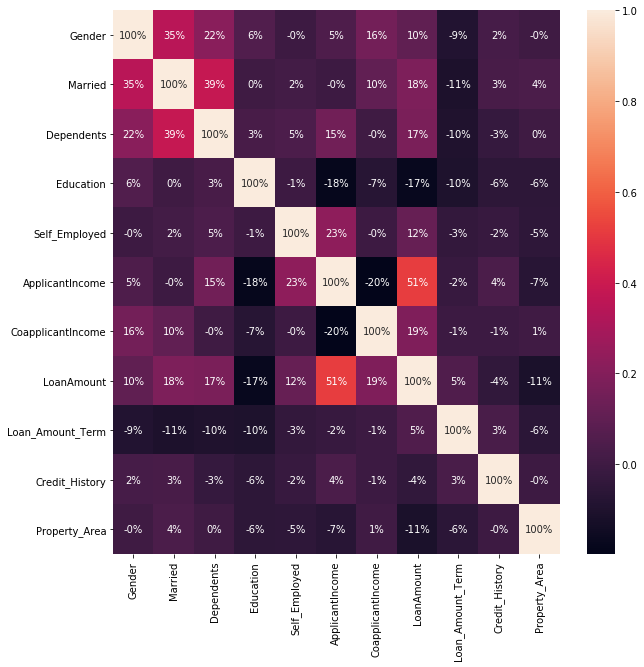

In [0]:
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:12].corr(),annot=True,fmt=".0%")

In [0]:
df.shape

(480, 13)

In [0]:
X=df.iloc[:,1:10].values
Y=df.iloc[:,11].values


In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [0]:
#create models
def models(X_train,Y_train):
  from sklearn.linear_model import LogisticRegression
  log=LogisticRegression(random_state=0)
  log.fit(X_train,Y_train)

  from sklearn.tree import DecisionTreeClassifier
  tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
  tree.fit(X_train,Y_train)

  from sklearn.ensemble import RandomForestClassifier
  rf=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
  rf.fit(X_train,Y_train)

  print('[0]Logistic Regression Training accuracy:',log.score(X_train,Y_train))
  print('[1]Decision Tree Training accuracy:',tree.score(X_train,Y_train))
  print('[2]rf Training accuracy:',rf.score(X_train,Y_train))

  return log,tree,rf







In [0]:
model=models(X_train,Y_train)

[0]Logistic Regression Training accuracy: 0.46111111111111114
[1]Decision Tree Training accuracy: 1.0
[2]rf Training accuracy: 0.9722222222222222


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  print('Model',i)
  cm=confusion_matrix(Y_test,model[i].predict(X_test))
  TP=cm[0][0]
  TN=cm[1][1]
  FN=cm[1][0]
  FP=cm[0][1]
  print(cm)
  print('Test acc:',(TP+TN)/(TP+TN+FP+FN))
  print()

Model 0
[[ 6 24  9]
 [ 9 28  7]
 [ 7 22  8]]
Test acc: 0.5074626865671642

Model 1
[[14 13 12]
 [14 10 20]
 [ 9 17 11]]
Test acc: 0.47058823529411764

Model 2
[[13 15 11]
 [15 14 15]
 [ 7 18 12]]
Test acc: 0.47368421052631576

